### Data Fields  
- datetime - hourly date + timestamp  <br>
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
- holiday - whether the day is considered a holiday<br>
- workingday - whether the day is neither a weekend nor holiday<br><br>
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
- temp - temperature in Celsius<br>
- atemp - "feels like" temperature in Celsius<br>
- humidity - relative humidity<br>
- windspeed - wind speed<br>
- casual - number of non-registered user rentals initiated<br>
- registered - number of registered user rentals initiated<br>
- count - number of total rentals<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

# 노트북 안 그래프 그리기
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 적용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 한글 제목 설정
plt.rc('font', family='Malgun Gothic')

# 한글 음수 부분 보이게 하기
plt.rc('axes', unicode_minus=False)

# 시각화 폰트 선명하게 보기
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina')

In [3]:
data = pd.read_csv('bike_train.csv', parse_dates=['datetime'])
data.shape

(10886, 12)

- 분류, 회귀 중 회귀 문제(자전거 대여량 예측)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- windspeed 중 0인 것도 보임 => 이 값을 어떤 값으로 채우는지에 따라 성능이 달라질 것으로 추측
- count가 이 데이터셋 에서 target 변수

In [6]:
data.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

> 결측치 없음

In [8]:
# 결측치 시각화 라이브러리 설치
# conda install -c conda-forge missingno

<AxesSubplot:>

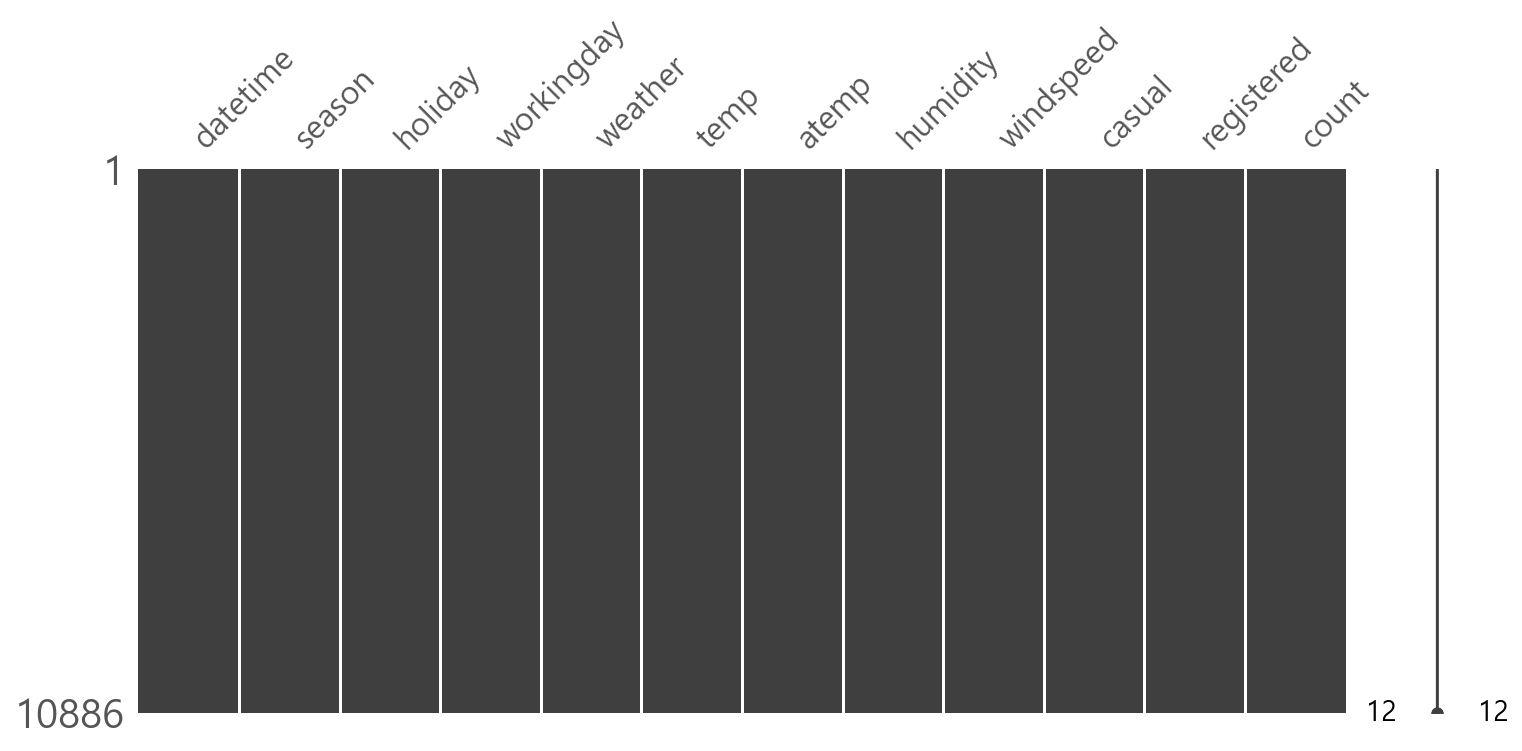

In [9]:
# 결측치 시각화 
import missingno as msno
msno.matrix(data, figsize=(12, 5))

In [10]:
# datetime열 구체적인 시간단위로 쪼개기

data['year'] = data['datetime'].dt.year 
data['month'] = data['datetime'].dt.month 
data['day'] = data['datetime'].dt.day 
data['hour'] = data['datetime'].dt.hour 
data['minute'] = data['datetime'].dt.minute 
data['second'] = data['datetime'].dt.second 

# 확인
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

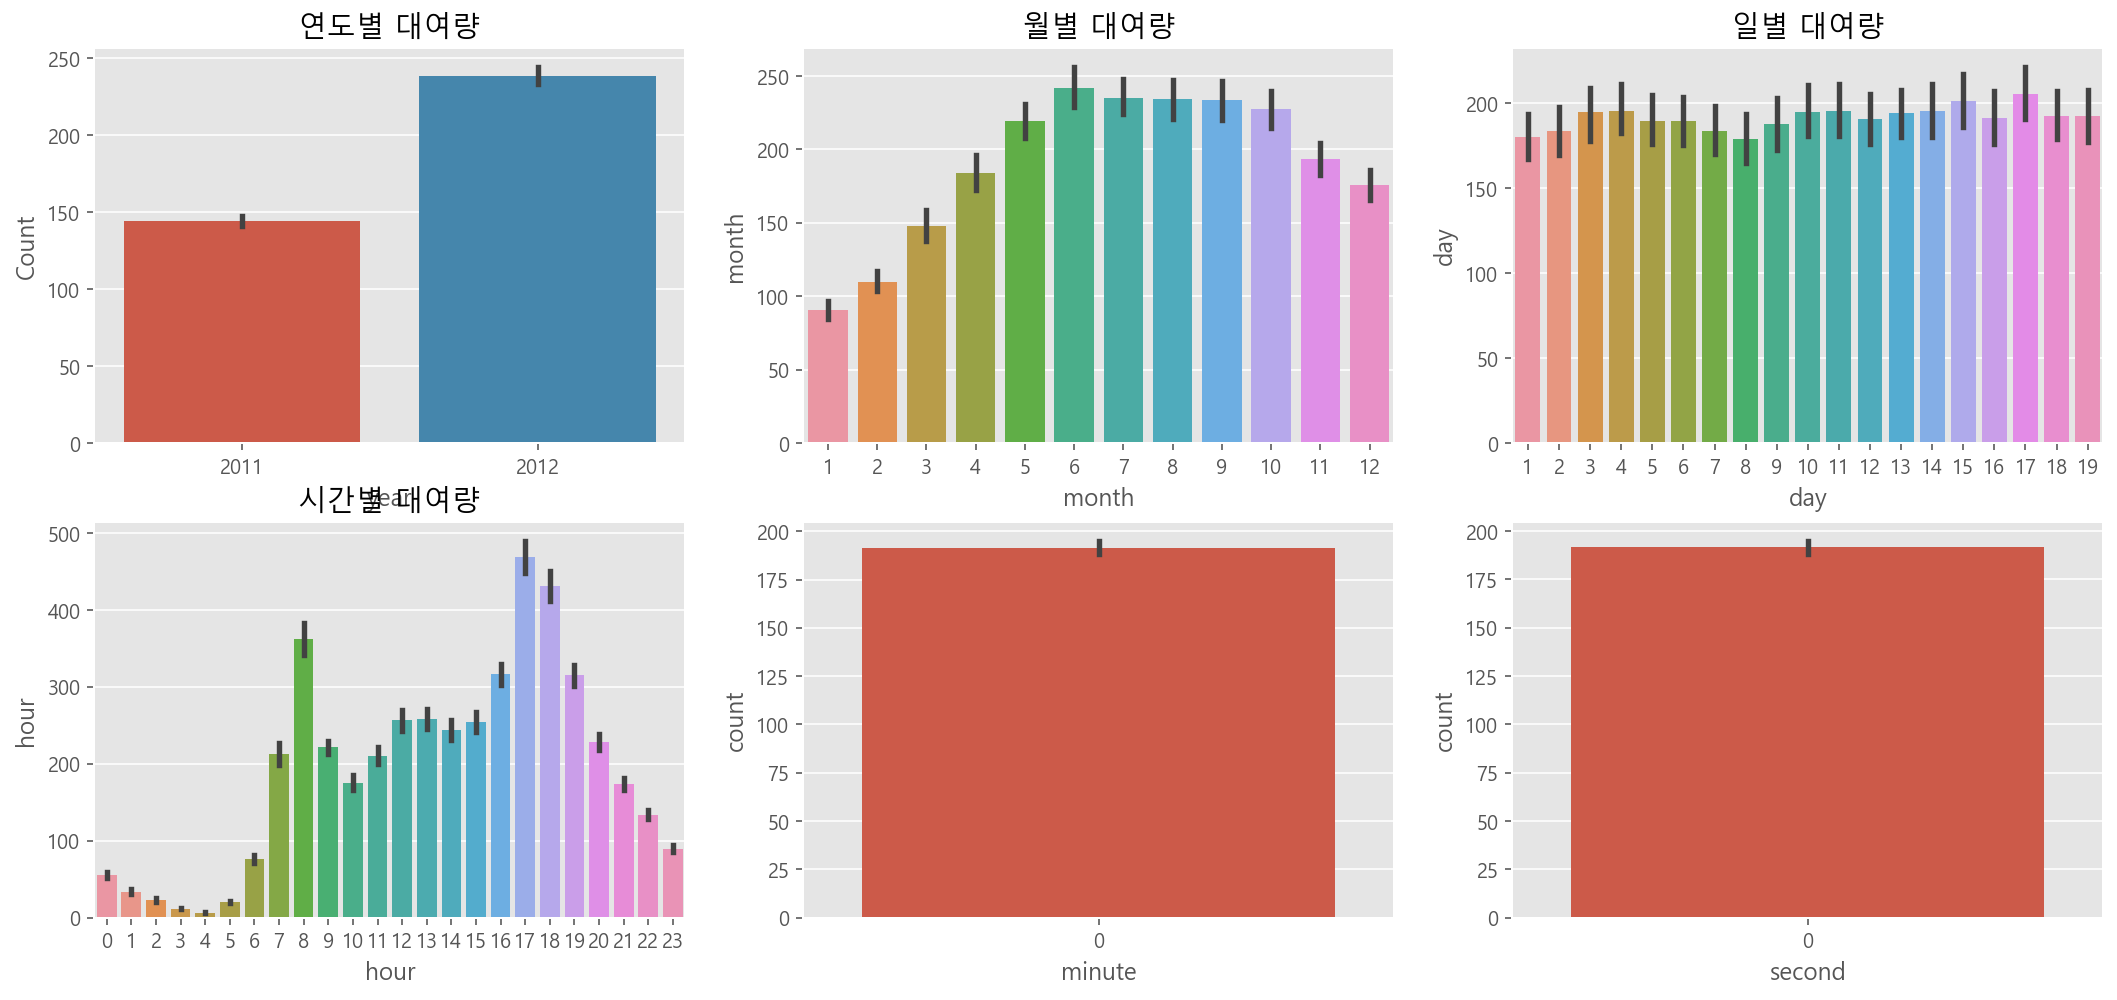

In [11]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=data, x='year', y='count', ax=ax1)
sns.barplot(data=data, x='month', y='count', ax=ax2)
sns.barplot(data=data, x='day', y='count', ax=ax3)
sns.barplot(data=data, x='hour', y='count', ax=ax4)
sns.barplot(data=data, x='minute', y='count', ax=ax5)
sns.barplot(data=data, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(ylabel='month', title='월별 대여량')
ax3.set(ylabel='day', title='일별 대여량')
ax4.set(ylabel='hour', title='시간별 대여량')

- 2011년 보다 2012년에 사용량이 더 많다.
- -> 2011년에 사용했던 사람들의 주변 사람들 홍보 또는 해당 회사의 마케팅 성공 등의 성공 요인이 있을 것으로 추측된다.
- 6-10월 따뜻한 달에 대여량이 많다.
- 일별 대여량에서 train 데이터셋에는 1-19일까지 밖에 없다. 나머지는 test 데이터셋에 있기 때문에 해당 변수는 feature로 사용하면 안됨
- 출퇴근 시간에 대여량이 많다.
- 분과 초는 모두 0이기 때문에 의미 없는 열이다.


In [12]:
data['dayofweek'] = data['datetime'].dt.dayofweek
data.shape

(10886, 19)

In [13]:
data['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, '계절별 대여량')]

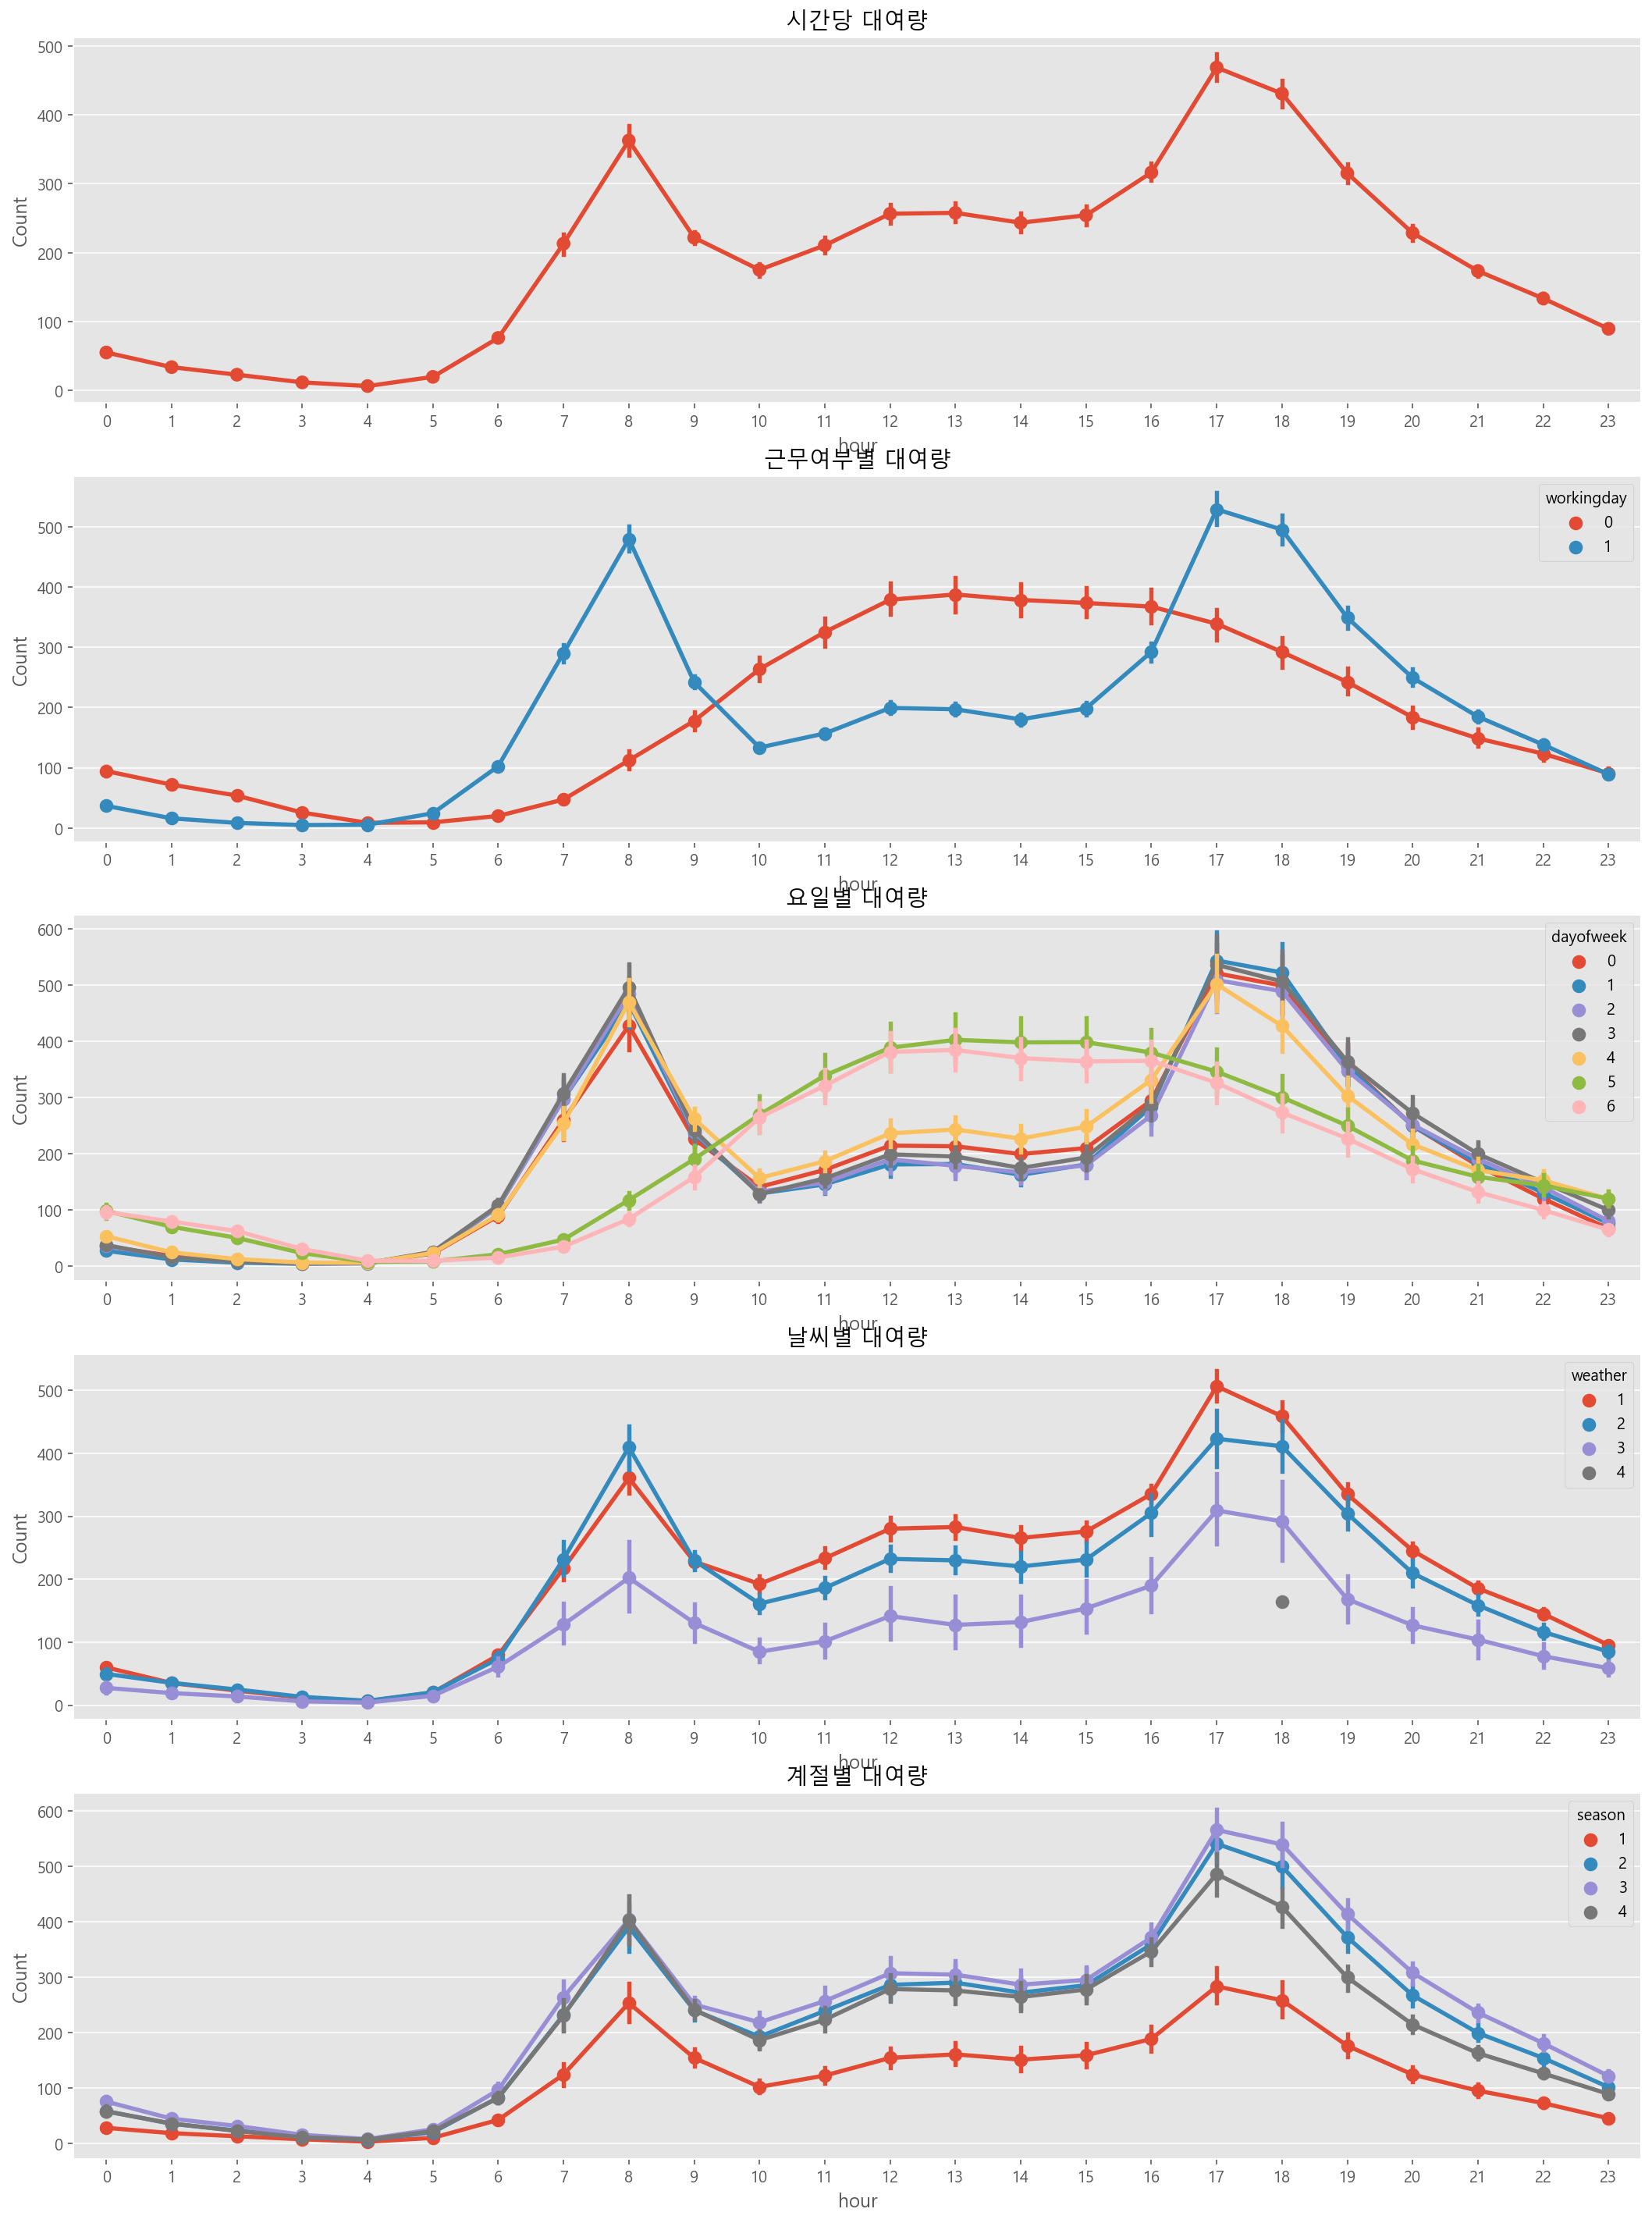

In [22]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data=data, x='hour', y='count', ax=ax1)
sns.pointplot(data=data, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=data, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=data, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=data, x='hour', y='count', hue='season', ax=ax5)

ax1.set(ylabel='Count', title='시간당 대여량')
ax2.set(ylabel='Count', title='근무여부별 대여량')
ax3.set(ylabel='Count', title='요일별 대여량')
ax4.set(ylabel='Count', title='날씨별 대여량')
ax5.set(ylabel='Count', title='계절별 대여량')

- 시간당 대여량에서 출퇴근 시간인 7-9시, 16-19시에 대여량이 많다.
- 근무여부별 대여량에서 근무날인 경우 출퇴근 시간에 대여량이 많고, 근무날이 아닌 경우 점심때부터 저녁때까지 대여량이 많다.
- 토, 일요일에는 점심부터 저녁까지 대여량이 많고, 평일에는 출퇴근 시간에 대여량이 많다.
- 날씨가 좋을수록 대여량이 증가하고, 안좋을 수록 대여량이 감소한다.
- 날씨가 많이 안좋은 날(4)에 대여량이 거의 없다.
- 가을 > 여름 > 겨울 > 봄 순으로 대여량이 많다.

In [15]:
# 상관관계 관련 변수 선언
corr_col = data[['temp', 'atemp', 'casual', 'registered',
           'humidity', 'windspeed', 'count']]

# 상관관계
corr_tot = corr_col.corr()

# array로 변환
mask = np.array(corr_tot)

# 상위 삼각형만 선택
mask[np.tril_indices_from(mask)] = False

<AxesSubplot:>

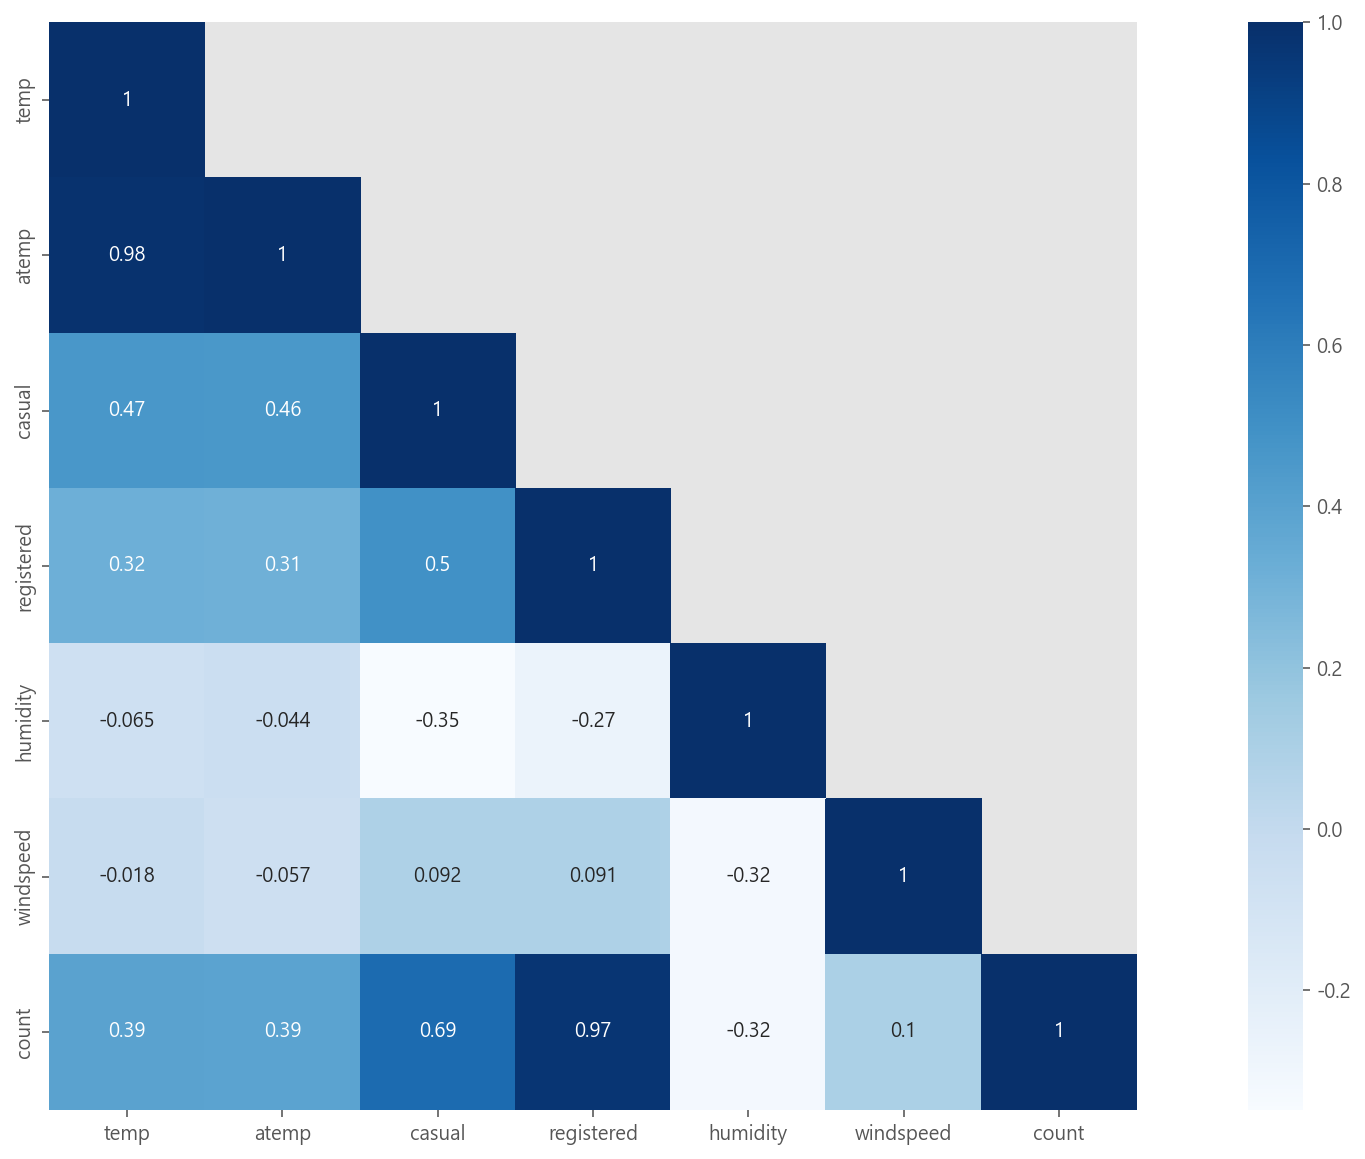

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr_tot, mask=mask, square=True, annot=True, cmap='Blues')

- 대여량과 온도, 습도, 풍속은 상관관계가 거의 없다.
- 대여량과 registered(등록된 대여자)는 0.97로 가장 상관관계가 높다.  --> test 데이터에는 이 값 없음
- 온도와 체감온도의 상관계수가 0.97로 매우 높기 때문에 둘 중 하나만 feature로 사용해도 무관해보인다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

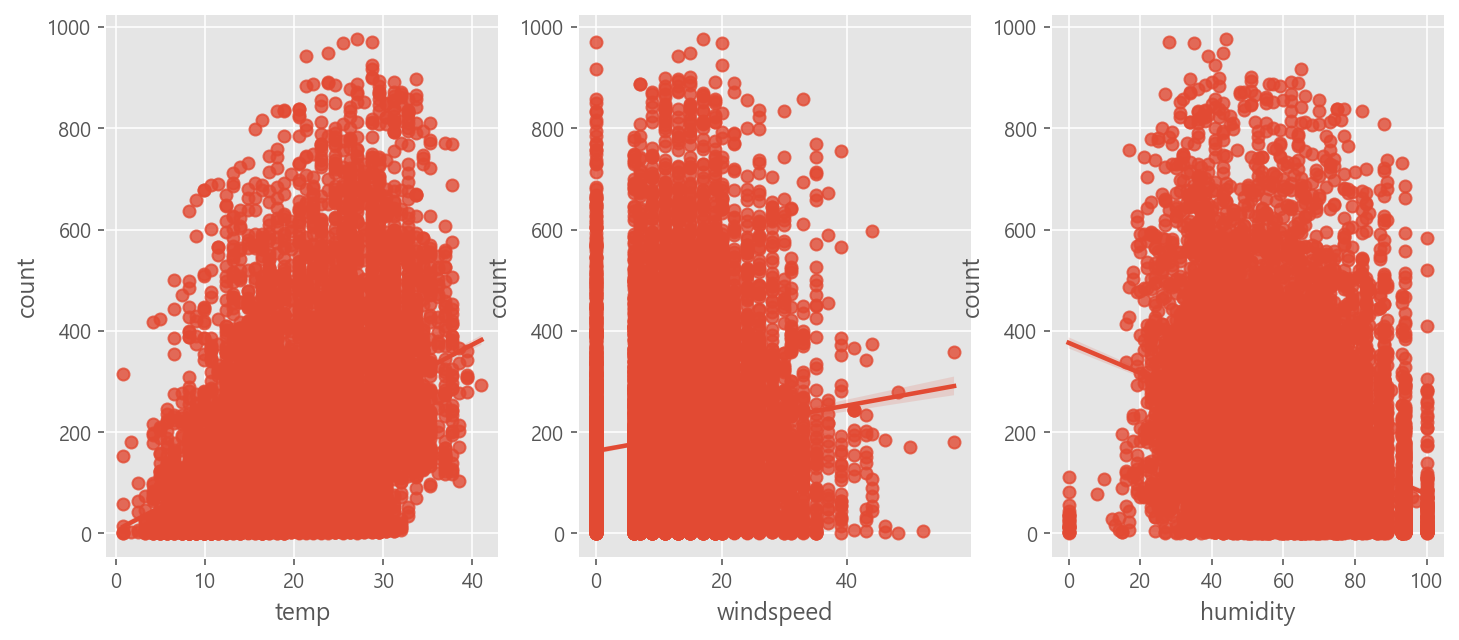

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x='temp', y='count', data=data, ax=ax1)
sns.regplot(x='windspeed', y='count', data=data, ax=ax2)
sns.regplot(x='humidity', y='count', data=data, ax=ax3)

- 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다.
- -> 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측한다.

In [18]:
# 연-월 붙이기 함수 
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

# 기존 열에 대하여 함수 적용시켜 새로운 열 만들기
data['year_month'] = data['datetime'].apply(concatenate_year_month)
data[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

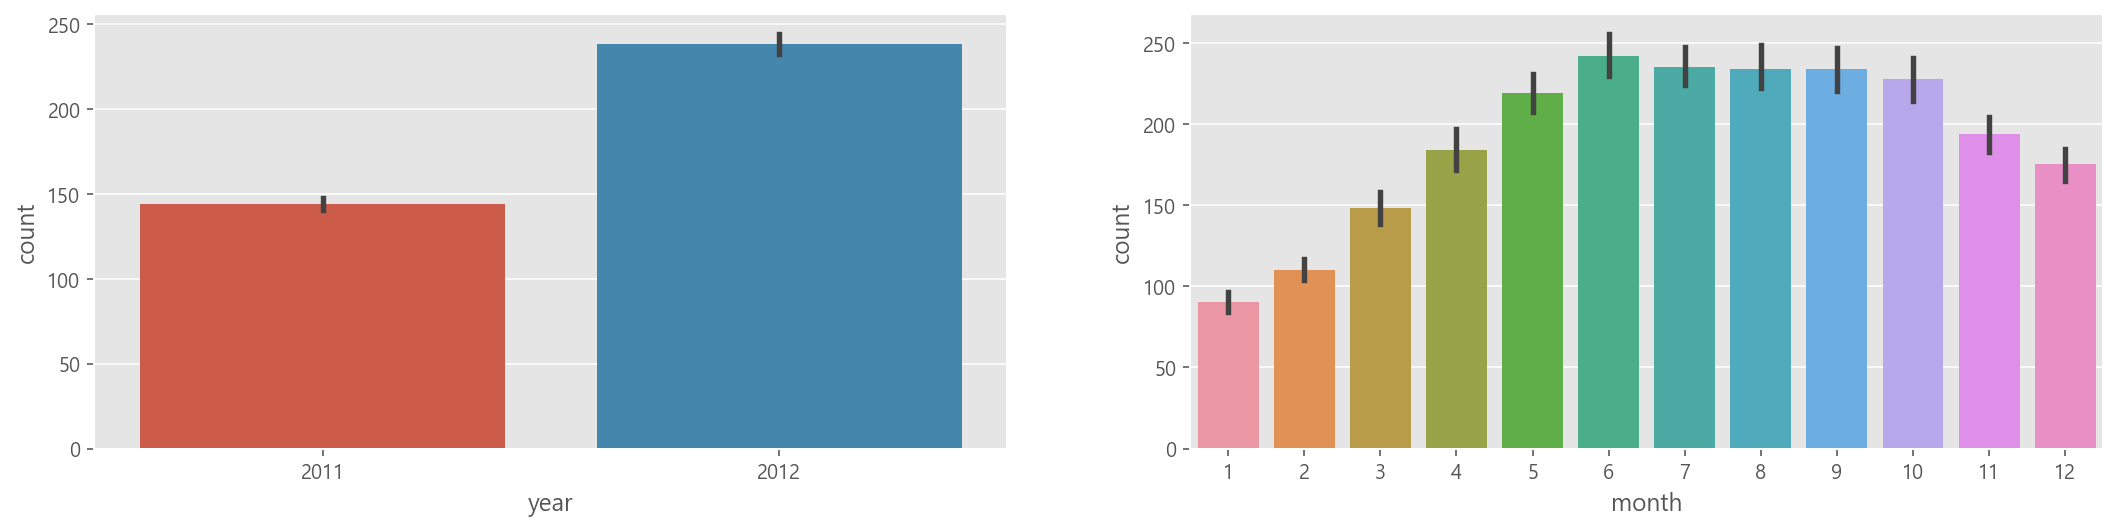

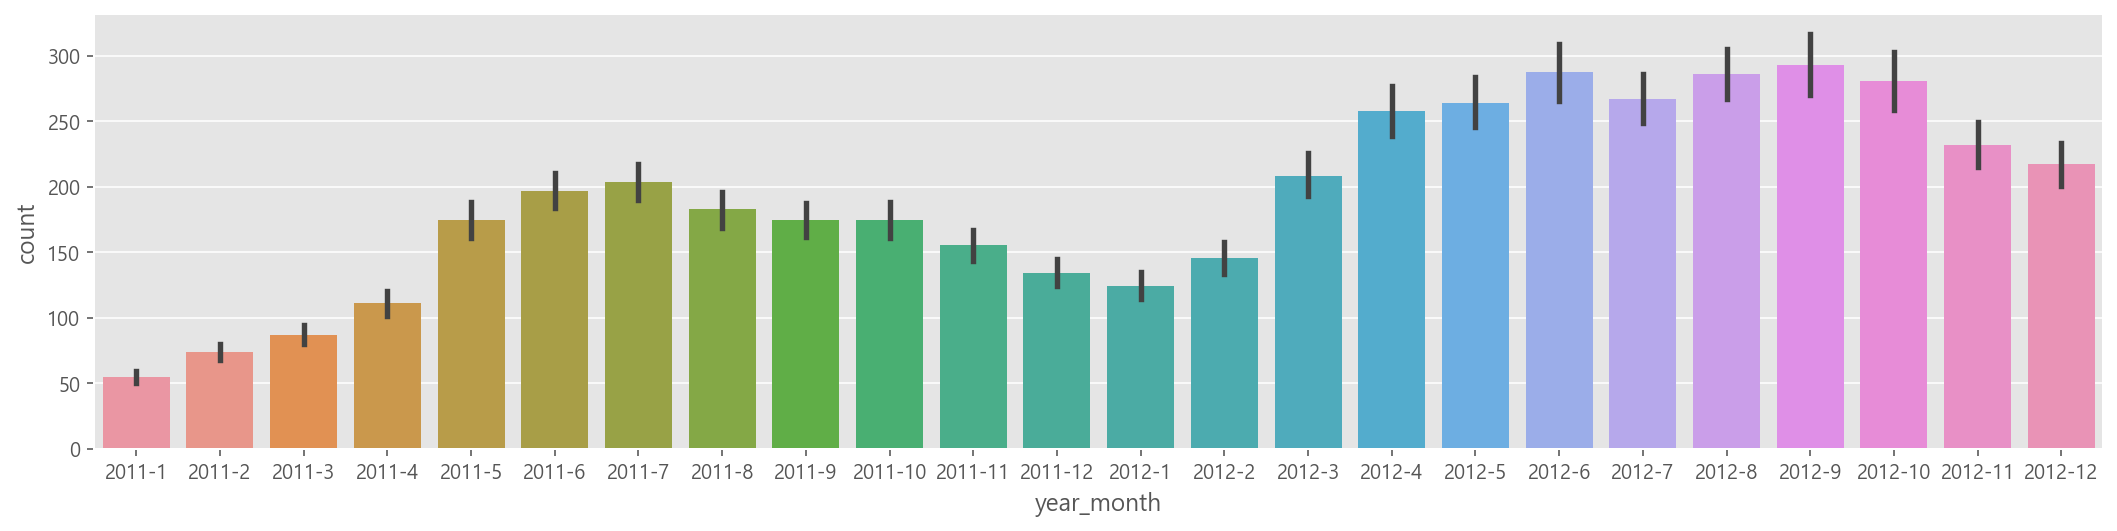

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=data, x='year', y='count', ax=ax1)
sns.barplot(data=data, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=data, x='year_month', y='count', ax=ax3)

- 